# Part 1 - Setup
- Import necessary packages for executing the code
- Load the MNIST data package

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV



# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the 'mnist' package from 'keras'
from keras.datasets import mnist

# Part 2 - Data Preparation
- Load the MNIST data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays

In [3]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Train data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Train data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [5]:
# Look at the frequency of the unique class labels in the training data
unique,counts = np.unique(y_train,return_counts=True)
print("Train Lables :",dict(zip(unique,counts)))

## Look at the frequency of the unique class labels in the testing data
unique,counts = np.unique(y_test,return_counts=True)
print("Test Lables :",dict(zip(unique,counts)))

Train Lables : {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test Lables : {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


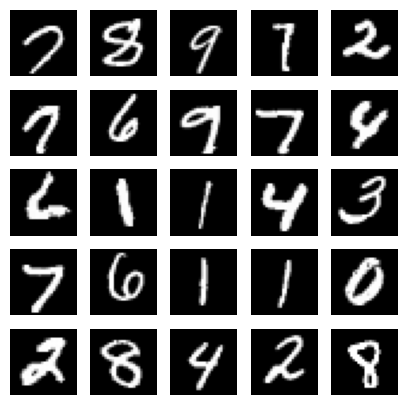

In [6]:
#Sample 25 MNIST digits from the training data and view the images
indices = np.random.randint(0,X_train.shape[0],size=25)

images = X_train[indices]
labels = X_train[indices]

plt.figure(figsize=(5,5))

for i in range(len(indices)):
  plt.subplot(5,5,i+1)
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')

plt.show()
plt.close('all')

In [7]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float')/255.0
X_test = X_test.astype("float")/255.0

In [8]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_class = 10

y_train = to_categorical(y_train,num_class)
y_test = to_categorical(y_test,num_class)

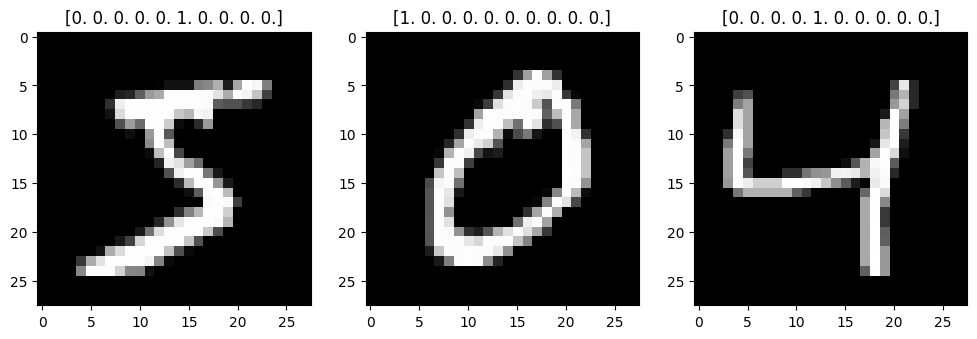

In [9]:
# View the first few training data images and their corresponding labels
plt.figure(figsize=(12,12))

for data_index in np.arange(0,3,1):
  plt.subplot(1,3,data_index+1)
  plt.imshow(X_train[data_index],cmap='gray')
  plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

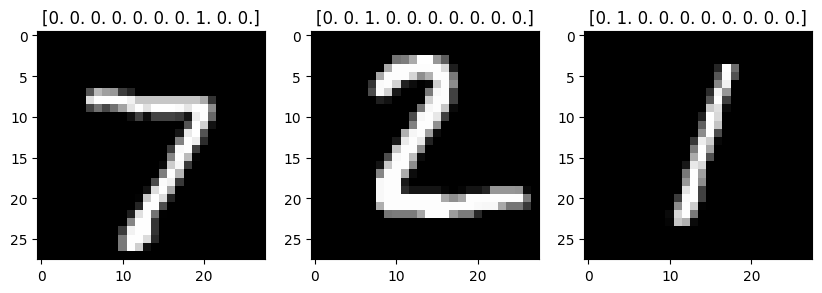

In [10]:
# View the first few testing data images and their corresponding labels
plt.figure(figsize=(10,10))

for data_index in np.arange(0,3,1):
  plt.subplot(1,3,data_index+1)
  plt.imshow(X_test[data_index],cmap='gray')
  plt.title(y_test[data_index])

plt.show()
plt.tight_layout()
plt.close('all')

In [11]:
# Flatten the images by converting them into a list of values
image_vector_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# Part 3 - Artificial Neural Networks in Keras

- Build a simple neural network using *keras* and understand each of the commands
- Compile the network to prepare it for training
- View a summary of the model prior to training to check the number of trainable parameters
- Train the model on the training data
- Check its performance on the testing data

In [12]:
# Create neural network and train it on the training data set for 500 epochs

nn2 = Sequential()

nn2.add(Dense(units = 16,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

nn2.add(Dense(units = num_class,
              activation = 'softmax'))

nn2.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')

# Capture the training history of the model
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 500)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.3499 - accuracy: 0.1023 - val_loss: 2.2866 - val_accuracy: 0.1096
Epoch 2/500
1/1 [==============================] - 0s 261ms/step - loss: 2.2893 - accuracy: 0.1057 - val_loss: 2.2479 - val_accuracy: 0.1362
Epoch 3/500
1/1 [==============================] - 0s 256ms/step - loss: 2.2509 - accuracy: 0.1346 - val_loss: 2.2167 - val_accuracy: 0

In [13]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,2.349910,0.102250,2.286628,0.109583
2,2.289320,0.105687,2.247890,0.136167
3,2.250867,0.134625,2.216743,0.178250
4,2.220026,0.179396,2.189893,0.227833
5,2.193485,0.229813,2.165866,0.278417
...,...,...,...,...
496,0.451601,0.898229,0.432808,0.904000
497,0.450814,0.898313,0.432052,0.904083
498,0.450031,0.898396,0.431299,0.904083


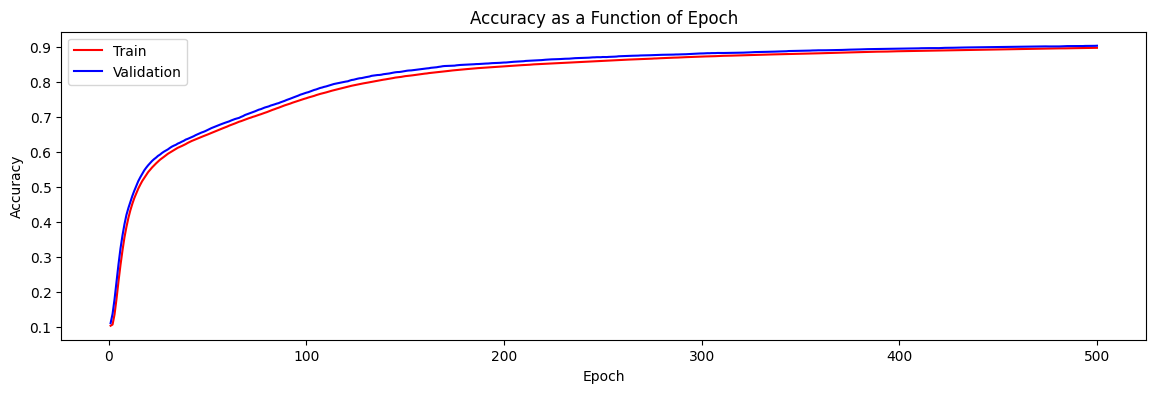

In [14]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [15]:
# Compute the accuracy of the model on the testing data set
performance_test = nn2.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.9024
The loss value of the model on the test data is 0.4371228516101837
The accuracy of the model on the test data is 0.902400016784668


# Part 5 - Hyperparameter Tuning: Number of Neurons in a Hidden Layer

- Create a basic neural network model for the data and tune it for the number of neurons in a hidden layer

- Check the performance of the model for different values of number of neurons

In [16]:
# Declare a range of number of neurons per hidden layer to tune for
n_neurons_list = [2, 4, 8, 16]

# Create and train a neural network model for each value of number of neurons per hidden layer
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for n_neu in n_neurons_list:
    indexcount = indexcount + 1

    nn = Sequential()

    nn.add(Dense(units = n_neu,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))

    nn.add(Dense(units = num_class,
                 activation = 'softmax'))

    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')

    print('\n Training and validation for {} neurons - START \n'.format(n_neu))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} neurons - END \n'.format(n_neu))

    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Neurons': n_neu,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 2 neurons - START 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1600 (6.25 KB)
Trainable params: 1600 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3340 - accuracy: 0.1140 - val_loss: 2.3227 - val_accuracy: 0.1060
Epoch 2/200
1/1 [==============================] - 0s 262ms/step - loss: 2.3188 - accuracy: 0.1140 - val_loss: 2.3128 - val_accuracy: 0.1060
Epoch 3/200
1/1 [==============================] - 0s 274ms/step - loss: 2.3090 - accur

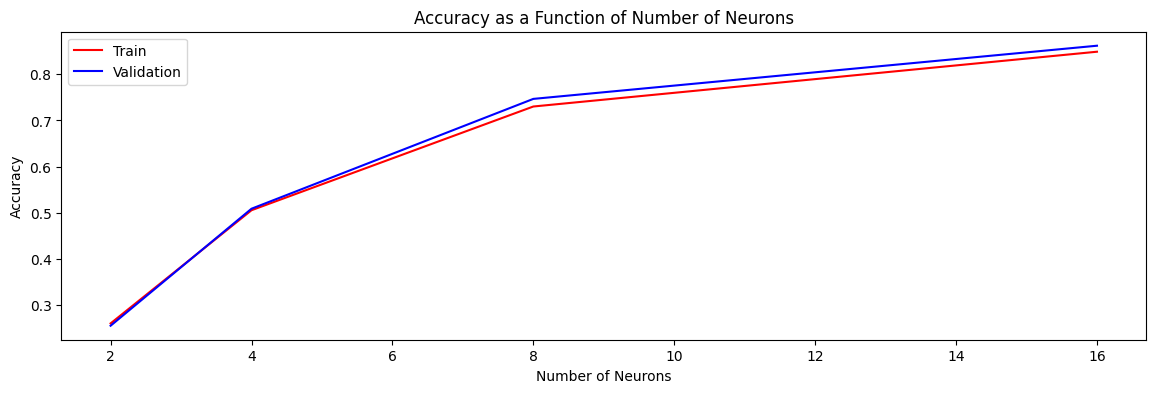

In [17]:
# View the training and validation accuracies as functions of number of neurons
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Neurons');

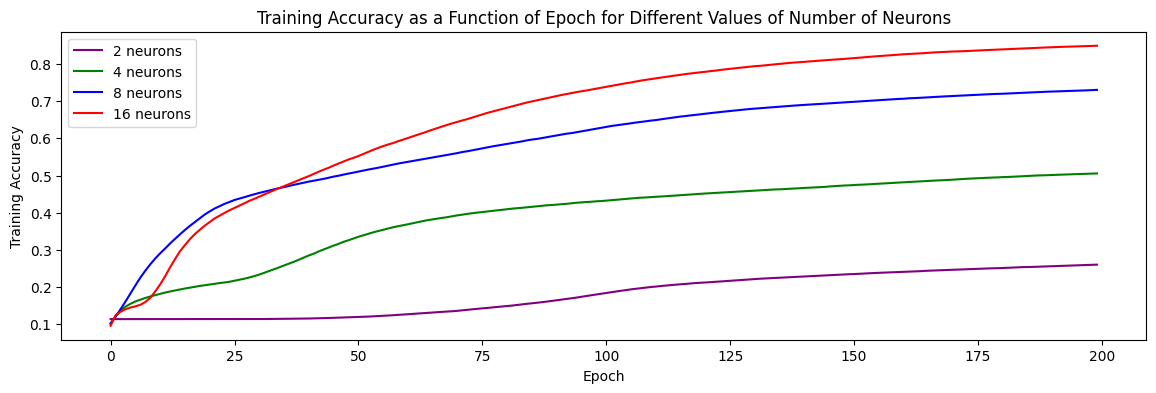

In [18]:
# View the training accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Neurons');

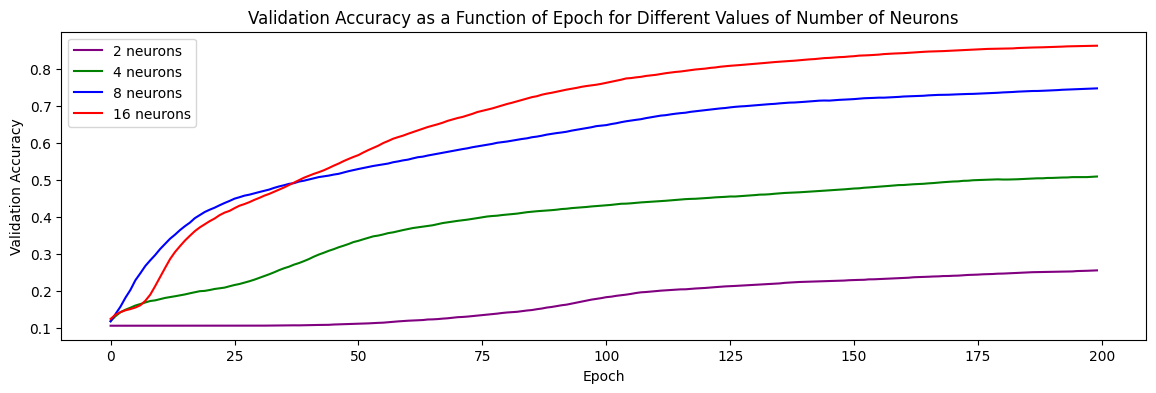

In [19]:
# View the validation accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Neurons');

# Part 6 - Hyperparameter Tuning: Number of Hidden Layers

- Create a basic neural network model for the data and tune it for the number of hidden layers

- Check the performance of the model for different values of number of hidden layers

In [20]:
# Declare a range of number of hidden layers to tune for
n_hidden_list = [1, 2, 3, 4]

# Create and train a neural network model for each value of number of hidden layers
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for n_hid in n_hidden_list:
    indexcount = indexcount + 1

    nn = Sequential()

    nn.add(Dense(units = 2,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))

    for temp_n_hid in np.arange(1, n_hid, 1):
        nn.add(Dense(units = 2,
                     activation = 'sigmoid'))

    nn.add(Dense(units = num_class,
                 activation = 'softmax'))

    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')

    print('\n Training and validation for {} hidden layers - START \n'.format(n_hid))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} hidden layers - END \n'.format(n_hid))

    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Hidden Layers': n_hid,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 1 hidden layers - START 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 1570      
                                                                 
 dense_11 (Dense)            (None, 10)                30        
                                                                 
Total params: 1600 (6.25 KB)
Trainable params: 1600 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3314 - accuracy: 0.0795 - val_loss: 2.3202 - val_accuracy: 0.0836
Epoch 2/200
1/1 [==============================] - 0s 235ms/step - loss: 2.3222 - accuracy: 0.0878 - val_loss: 2.3137 - val_accuracy: 0.0901
Epoch 3/200
1/1 [==============================] - 0s 245ms/step - loss: 2.3158 -

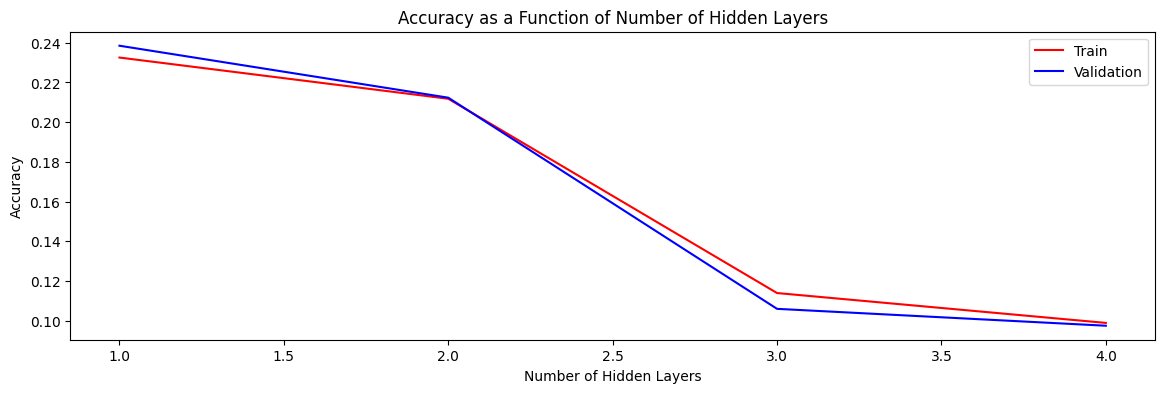

In [21]:
# View the training and validation accuracies as functions of number of hidden layers
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Hidden Layers');

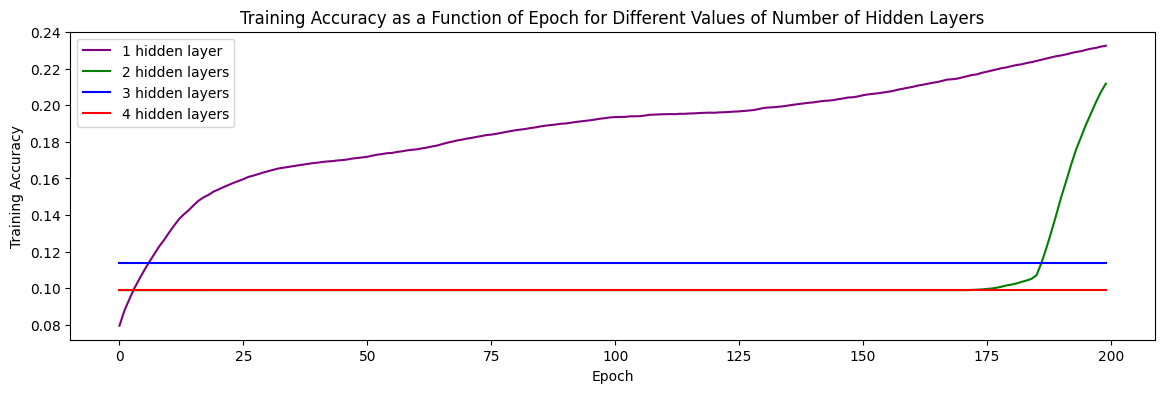

In [22]:
# View the training accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

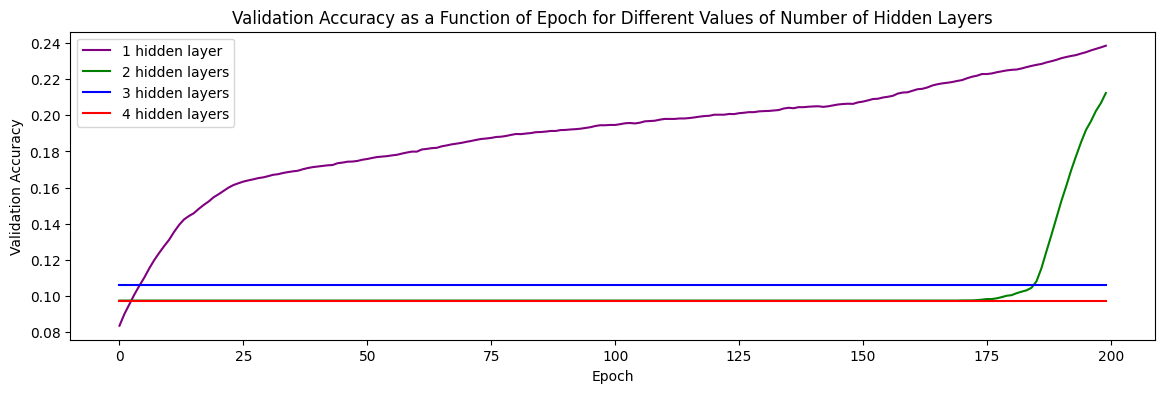

In [23]:
# View the training accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

# Part 7 - Hyperparameter Tuning: Combinations of Hyperparameters

- Create a basic neural network model for the data and tune it for combinations of number of neurons and number of hidden layers
  - We will use *GridSearchCV* to execute this
- Check the performance of the model for different values of number of hidden layers

In [24]:
def create_nn(n_hidden = 1, n_neurons = 8):
    nn = Sequential()

    nn.add(Dense(n_neurons,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))

    for n_hid in np.arange(1, n_hidden, 1):
        nn.add(Dense(n_neurons,
                     activation = 'sigmoid'))

    nn.add(Dense(num_class,
                 activation = 'softmax'))

    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')

    return(nn)

In [27]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
# Initialize a basic neural network object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn'
base_grid_model = KerasClassifier(build_fn = create_nn,n_hidden=1,n_neurons=8)

# Define the range of the 'n_hidden' and 'n_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {'n_hidden': [1, 2], 'n_neurons': [8, 16,32,64,128]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

grid_model = grid.fit(X_train, y_train, batch_size = X_train.shape[0], epochs = 200)

# Print the optimal values of 'n_hidden' and 'n_neurons'
best_n_hidden = grid_model.best_params_['n_hidden']
best_n_neurons = grid_model.best_params_['n_neurons']

print('The optimal value of number of hidden layers is', best_n_hidden)
print('The optimal value of number of neurons per hidden layer is', best_n_neurons)

Streaming output truncated to the last 5000 lines.
Epoch 114/200
1/1 [==============================] - 0s 336ms/step - loss: 0.4168 - accuracy: 0.8912
Epoch 115/200
1/1 [==============================] - 0s 338ms/step - loss: 0.4142 - accuracy: 0.8939
Epoch 116/200
1/1 [==============================] - 0s 352ms/step - loss: 0.4117 - accuracy: 0.8920
Epoch 117/200
1/1 [==============================] - 0s 338ms/step - loss: 0.4093 - accuracy: 0.8944
Epoch 118/200
1/1 [==============================] - 0s 337ms/step - loss: 0.4069 - accuracy: 0.8933
Epoch 119/200
1/1 [==============================] - 0s 349ms/step - loss: 0.4046 - accuracy: 0.8948
Epoch 120/200
1/1 [==============================] - 0s 340ms/step - loss: 0.4023 - accuracy: 0.8945
Epoch 121/200
1/1 [==============================] - 0s 334ms/step - loss: 0.4000 - accuracy: 0.8956
Epoch 122/200
1/1 [==============================] - 0s 344ms/step - loss: 0.3978 - accuracy: 0.8953
Epoch 123/200
1/1 [=====================

In [28]:
# Create a neural network model with a combination of potentially optimal hyperparameter values and train the model
nn = Sequential()

nn.add(Dense(units = 128,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

nn.add(Dense(units = num_class,
              activation = 'softmax'))

nn.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')
# Capture the training history of the model
nn.summary()
print('\n')
nn_history =nn.fit(X_train,y_train,batch_size=X_train.shape[0],validation_split=0.2,epochs=200)

hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4646 - accuracy: 0.1098 - val_loss: 2.2246 - val_accuracy: 0.2206
Epoch 2/200
1/1 [==============================] - 1s 644ms/step - loss: 2.2258 - accuracy: 0.2187 - val_loss: 2.1053 - val_accuracy: 0.3005
Epoch 3/200
1/1 [==============================] - 1s 596ms/step - loss: 2.1099 - accuracy: 0.2911 - val_loss: 2.0167 - val_accu

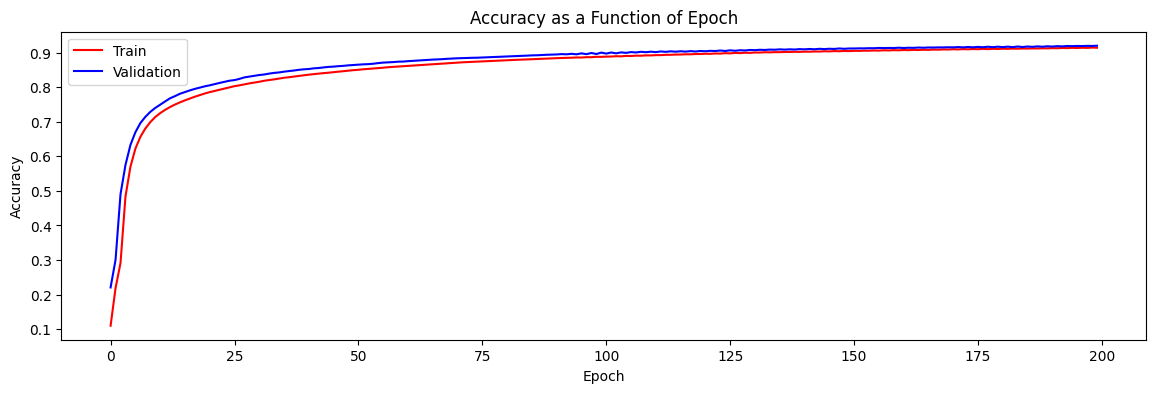

In [29]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [30]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.9199
The loss value of the model on the test data is 0.28791990876197815
The accuracy of the model on the test data is 0.9199000000953674
